# Modul 03

## Session 03 Supervised Learning Classification

## K-Nearest Neigbours

What to do in this chapter:

1. Apply KNN method (k=3)
    * target: (quality > 6 --> Y = 1 = good, Y = 0 = bad)
    * features: density, alcohol
2. Validate the model using accuarcy in 20% testing data
3. Apply scaling and validate the model using accuracy in 20% testing data
4. Apply scaling choose factor k based on accuracy:
    * k = (1,3,5,...,29)

## Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
wine = pd.read_csv('./datasets/winequality-white.csv', delimiter=';')
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [3]:
wine['label'] = np.where(wine['quality'] > 6, 1, 0)

In [4]:
wine[['quality', 'label']]

,quality,label
0,6,0
1,6,0
2,6,0
3,6,0
4,6,0
...,...,...
4893,6,0
4894,5,0
4895,6,0
4896,7,1


## EDA

In [5]:
import seaborn as sns

<AxesSubplot:xlabel='density', ylabel='alcohol'>

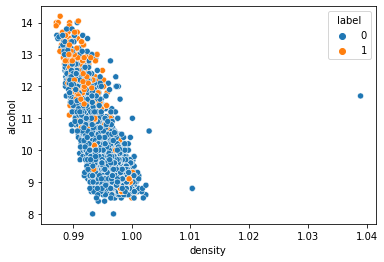

In [6]:
sns.scatterplot(x ='density', y ='alcohol', hue='label', data=wine)

## Data Splitting

In [7]:
## data splitting
X = wine[['alcohol', 'density']]
y = wine['label']

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=2020
)

## Scaling

Scaler fit only use on train data

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## KNN without Scaling

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [13]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [14]:
y_pred_class = knn.predict(X_test)

In [15]:
print('Model accuracy : ', accuracy_score(y_test, y_pred_class)*100, '%')

Model accuracy :  81.42857142857143 %


## KNN with Scaling

In [16]:
knn_scaled = KNeighborsClassifier(n_neighbors=3)
knn_scaled.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [17]:
y_pred_scaled = knn.predict(X_test_scaled)

In [18]:
print('Model accuracy : ', accuracy_score(y_test, y_pred_scaled)*100, '%')

Model accuracy :  79.48979591836735 %


## Choosing the best K-factor

In [19]:
import matplotlib.pyplot as plt

In [20]:
k = range(1,30,2)
testing_accuracy = []
training_accuracy = []
score = 0

for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled, y_train)

    y_pred_train = knn.predict(X_train_scaled)
    acc_train = accuracy_score(y_train, y_pred_train)
    training_accuracy.append(acc_train)

    y_pred_test = knn.predict(X_test_scaled)
    acc_test = accuracy_score(y_test, y_pred_test)
    testing_accuracy.append(acc_test)

    if score < acc_test:
        score = acc_test
        best_k = i 

In [21]:
print('Best K: ', best_k)
print('Score: ', score)

Best K:  17
Score:  0.8183673469387756


<AxesSubplot:>

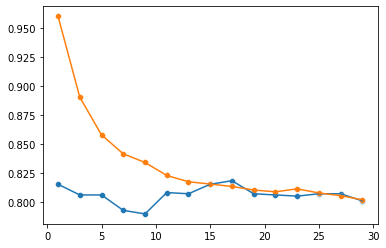

In [22]:
sns.lineplot(x=k, y=testing_accuracy)
sns.scatterplot(x=k, y=testing_accuracy)

sns.lineplot(x=k, y=training_accuracy)
sns.scatterplot(x=k, y=training_accuracy)